In [60]:
import pandas as pd
import seaborn as sns
%matplotlib inline

## Task 1

### POLITICAL SEATS DATAFRAME

Read the political_seats csv with the "iso8859_10" to support nordic characters

In [61]:
political_seats = pd.read_csv("../datasets/political_seats.csv", encoding="iso8859_10", header=1)
political_seats

,region,party,1973,1976,1979,1982,1985,1988,1991,1994,1998,2002,2006,2010,2014,2018,2022
0,0114 Upplands Väsby,The Moderate Party,6,7,10,13,13,12,15,14,16,11,17,17,13,12,11
1,0114 Upplands Väsby,The Centre Party,9,7,6,4,2,2,2,2,2,2,2,2,2,2,2
2,0114 Upplands Väsby,The Liberal Party,4,5,5,3,6,7,6,4,4,8,6,6,4,3,2
3,0114 Upplands Väsby,The Christian Democratic Party,0,0,0,1,0,0,2,1,3,3,3,2,2,3,2
4,0114 Upplands Väsby,The Green Party,..,..,..,1,2,4,2,3,2,2,3,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2584 Kiruna,The Green Party,..,..,..,0,0,1,1,2,1,2,1,1,1,0,0
2615,2584 Kiruna,The Social Democratic Party,22,24,25,27,26,25,23,14,16,15,16,16,15,12,19
2616,2584 Kiruna,The Left Party,9,8,7,8,8,8,8,8,5,6,5,6,4,3,4
2617,2584 Kiruna,The Sweden Democrats,..,..,..,..,..,0,0,0,0,0,0,0,1,2,2


Check for null values, in the case of SCB datasets that is "..", replace them with zeros

In [62]:
# ".." in this case is a null value.
print(political_seats.eq("..").sum())
political_seats = political_seats.replace("..", 0)
political_seats.eq("..").any()

region      0
party       0
1973      673
1976      680
1979      666
1982      347
1985      347
1988       63
1991       45
1994       27
1998       18
2002        9
2006        9
2010        9
2014        9
2018        0
2022        0
dtype: int64


region    False
party     False
1973      False
1976      False
1979      False
1982      False
1985      False
1988      False
1991      False
1994      False
1998      False
2002      False
2006      False
2010      False
2014      False
2018      False
2022      False
dtype: bool

Replace the year columns to make them the indices along with the regions instead of having years as columns.
The new columns will now be the different political parties with their respektive seat count as values

In [63]:
political_seats = political_seats.melt(id_vars=["region", "party"], var_name="year", value_name="value")
political_seats = political_seats.pivot_table(index=["year", "region"], columns="party", values="value")
political_seats

party                     Other Parties  The Centre Party  \
year region                                                 
1973 0114 Upplands Väsby            0.0               9.0   
     0115 Vallentuna                0.0              12.0   
     0117 Österåker                 0.0               0.0   
     0120 Värmdö                    0.0               8.0   
     0123 Järfälla                  0.0              10.0   
...                                 ...               ...   
2022 2580 Luleå                     2.0               4.0   
     2581 Piteå                     3.0               5.0   
     2582 Boden                     4.0               3.0   
     2583 Haparanda                 2.0               6.0   
     2584 Kiruna                    6.0               4.0   

party                     The Christian Democratic Party  The Green Party  \
year region                                                                 
1973 0114 Upplands Väsby                             0.0              0.0   
     0115 Vallentuna                                 0.0              0.0   
     0117 Österåker                                  0.0              0.0   
     0120 Värmdö                                     0.0              0.0   
     0123 Järfälla                                   0.0              0.0   
...                                                  ...              ...   
2022 2580 Luleå                                      4.0              2.0   
     2581 Piteå                                      2.0              1.0   
     2582 Boden                                      1.0              0.0   
     2583 Haparanda                                  2.0              0.0   
     2584 Kiruna                                     5.0              0.0   

party                     The Left Party  The Liberal Party  \
year region                                                   
1973 0114 Upplands Väsby             3.0                4.0   
     0115 Vallentuna                 2.0                6.0   
     0117 Österåker                  0.0                0.0   
     0120 Värmdö                     3.0                4.0   
     0123 Järfälla                   3.0                7.0   
...                                  ...                ...   
2022 2580 Luleå                      6.0                3.0   
     2581 Piteå                      5.0                0.0   
     2582 Boden                      3.0                0.0   
     2583 Haparanda                  1.0                0.0   
     2584 Kiruna                     4.0                0.0   

party                     The Moderate Party  The Social Democratic Party  \
year region                                                                 
1973 0114 Upplands Väsby                 6.0                         19.0   
     0115 Vallentuna                     7.0                         14.0   
     0117 Österåker                      0.0                          0.0   
     0120 Värmdö                         7.0                         19.0   
     0123 Järfälla                      10.0                         21.0   
...                                      ...                          ...   
2022 2580 Luleå                         10.0                         24.0   
     2581 Piteå                          8.0                         22.0   
     2582 Boden                          7.0                         24.0   
     2583 Haparanda                      4.0                         12.0   
     2584 Kiruna                         5.0                         19.0   

party                     The Sweden Democrats  
year region                                     
1973 0114 Upplands Väsby                   0.0  
     0115 Vallentuna                       0.0  
     0117 Österåker                        0.0  
     0120 Värmdö                           0.0  
     0123 Järfälla                         0.0  
...                                    

### INCOME STATEMENTS DATAFRAME

Read the income_statements csv with the "iso8859_10" to support nordic characters.
Remove the year 2022 since there is insufficient data on the four year run period for the political parties

In [64]:
income = pd.read_csv("../datasets/income_statements.csv", encoding="iso8859_10", header=1)

In [65]:
income = income.drop("2022", axis=1)
income = income.melt(id_vars=["region", "Income statement"], var_name="year", value_name="value")

Replace null values with zeros

In [66]:
income = income.replace("..", 0)

Set the data type to float for the values in column "value" to make it possible to calculate with the values.

In [67]:
income["value"] = income["value"].astype(float)

In [68]:
income

,region,Income statement,year,value
0,0114 Upplands Väsby,Total income for operations,1998,313859.0
1,0114 Upplands Väsby,Total costs for operations,1998,-1141598.0
2,0114 Upplands Väsby,Total net current costs,1998,-889629.0
3,0114 Upplands Väsby,Tax revenues,1998,897383.0
4,0114 Upplands Väsby,General grants and equalisation grants,1998,45111.0
...,...,...,...,...
69595,2584 Kiruna,Net profit/loss for operations,2021,801487.0
69596,2584 Kiruna,Financial income,2021,14378.0
69597,2584 Kiruna,Financial costs,2021,-16791.0
69598,2584 Kiruna,Net profit/loss after financial items,2021,799074.0


In [69]:
#df.loc[df["Product Type"].isin(["Coffee", "Espresso"])].index.to_list()
regions =  income["region"].unique().tolist()
#print(regions)
#vf = income.loc[income.loc[income["region"].isin(['0114 Upplands Väsby'])].index.to_list(), ["region", "year", "value"]]
#vf.loc[0::10][4:4]
#vf.loc[0::10]
#print(vf.loc[0::10][4*8:4*8+1:]["value"])#[start:stop:step]
tmp = pd.DataFrame(columns=income.columns.to_list())
for reg in regions:
  vf = income.loc[income.loc[income["region"].isin([reg])].index.to_list()]
  vf = vf.reset_index()
  for feat in range(10): # len featuers
    fea_df = vf.loc[feat::10].reset_index()
    for i in range(int(len(fea_df["year"])/4)):
      row = pd.DataFrame([{
        "region":fea_df.loc[i, "region"],
        "Income statement": fea_df.loc[i, "Income statement"],
        "year":fea_df.loc[i*4, "year"],
        "value":fea_df.loc[4*i:4*(i+1)]["value"].mean()
        }])
      tmp = pd.concat([tmp, row])

In [70]:
tmp  = tmp.reset_index().drop("index", axis=1)

In [71]:
tmp

,region,Income statement,year,value
0,0114 Upplands Väsby,Total income for operations,1998,325932.8
1,0114 Upplands Väsby,Total income for operations,2002,319815.0
2,0114 Upplands Väsby,Total income for operations,2006,358176.2
3,0114 Upplands Väsby,Total income for operations,2010,459360.6
4,0114 Upplands Väsby,Total income for operations,2014,569602.6
...,...,...,...,...
17395,2584 Kiruna,Net profit/loss for the year,2002,8888.8
17396,2584 Kiruna,Net profit/loss for the year,2006,20779.2
17397,2584 Kiruna,Net profit/loss for the year,2010,81600.0
17398,2584 Kiruna,Net profit/loss for the year,2014,655998.6


Same as with political_seats: set the indices to the year with the region as index and set all the different income statements as columns with their respective values remaining the values

In [72]:
income = tmp.pivot_table(index=["year", "region"], columns="Income statement", values="value")
income

Income statement          Financial costs  Financial income  \
year region                                                   
1998 0114 Upplands Väsby        -20390.60           8984.60   
     0115 Vallentuna             -4547.20           4123.00   
     0117 Österåker              -9773.80           2411.00   
     0120 Värmdö                 -2957.00          10727.40   
     0123 Järfälla              -26190.80          36771.60   
...                                   ...               ...   
2018 2580 Luleå                 -10524.00          73095.00   
     2581 Piteå                  -7309.00          36765.25   
     2582 Boden                  -6486.50           7889.00   
     2583 Haparanda              -6828.25           5944.75   
     2584 Kiruna                -17938.50          13694.00   

Income statement          General grants and equalisation grants  \
year region                                                        
1998 0114 Upplands Väsby                                10179.40   
     0115 Vallentuna                                    52571.00   
     0117 Österåker                                     -4838.40   
     0120 Värmdö                                        57062.00   
     0123 Järfälla                                     -35627.80   
...                                                          ...   
2018 2580 Luleå                                        633685.75   
     2581 Piteå                                        448301.50   
     2582 Boden                                        464836.25   
     2583 Haparanda                                    266574.50   
     2584 Kiruna                                       203822.75   

Income statement          Net profit/loss after financial items  \
year region                                                       
1998 0114 Upplands Väsby                               22501.20   
     0115 Vallentuna                                   -8081.00   
     0117 Österåker                                   -12251.60   
     0120 Värmdö                                       -4532.20   
     0123 Järfälla                                     -1105.20   
...                                                         ...   
2018 2580 Luleå                                       243807.50   
     2581 Piteå                                       121148.00   
     2582 Boden                                        -1115.75   
     2583 Haparanda                                    39768.75   
     2584 Kiruna                                      456764.00   

Income statement          Net profit/loss for operations  \
year region                                                
1998 0114 Upplands Väsby                             0.0   
     0115 Vallentuna                                 0.0   
     0117 Österåker                                  0.0   
     0120 Värmdö                                     0.0   
     0123 Järfälla                                   0.0   
...                                                  ...   
2018 2580 Luleå                                 189190.5   
     2581 Piteå                                  79501.5   
     2582 Boden                                   1438.0   
     2583 Haparanda                              28813.0   
     2584 Kiruna                                306195.5   

Income statement          Net profit/loss for the year  Tax revenues  \
year region                                                            
1998 0114 Upplands Väsby                      86213.80    1035853.20   
     0115 Vallentuna                           5611.80     600340.40   
     0117 Österåker                           13748.40     950220.60   
     0120 Värmdö                             -13729.40     762257.20   
     0123 Järfälla                            -1105.20    1690228.80   
...                                                ...           ...   
2018 2580 Luleå                              243807.50    4148595.

### Data Prep

In [73]:
income

Income statement          Financial costs  Financial income  \
year region                                                   
1998 0114 Upplands Väsby        -20390.60           8984.60   
     0115 Vallentuna             -4547.20           4123.00   
     0117 Österåker              -9773.80           2411.00   
     0120 Värmdö                 -2957.00          10727.40   
     0123 Järfälla              -26190.80          36771.60   
...                                   ...               ...   
2018 2580 Luleå                 -10524.00          73095.00   
     2581 Piteå                  -7309.00          36765.25   
     2582 Boden                  -6486.50           7889.00   
     2583 Haparanda              -6828.25           5944.75   
     2584 Kiruna                -17938.50          13694.00   

Income statement          General grants and equalisation grants  \
year region                                                        
1998 0114 Upplands Väsby                                10179.40   
     0115 Vallentuna                                    52571.00   
     0117 Österåker                                     -4838.40   
     0120 Värmdö                                        57062.00   
     0123 Järfälla                                     -35627.80   
...                                                          ...   
2018 2580 Luleå                                        633685.75   
     2581 Piteå                                        448301.50   
     2582 Boden                                        464836.25   
     2583 Haparanda                                    266574.50   
     2584 Kiruna                                       203822.75   

Income statement          Net profit/loss after financial items  \
year region                                                       
1998 0114 Upplands Väsby                               22501.20   
     0115 Vallentuna                                   -8081.00   
     0117 Österåker                                   -12251.60   
     0120 Värmdö                                       -4532.20   
     0123 Järfälla                                     -1105.20   
...                                                         ...   
2018 2580 Luleå                                       243807.50   
     2581 Piteå                                       121148.00   
     2582 Boden                                        -1115.75   
     2583 Haparanda                                    39768.75   
     2584 Kiruna                                      456764.00   

Income statement          Net profit/loss for operations  \
year region                                                
1998 0114 Upplands Väsby                             0.0   
     0115 Vallentuna                                 0.0   
     0117 Österåker                                  0.0   
     0120 Värmdö                                     0.0   
     0123 Järfälla                                   0.0   
...                                                  ...   
2018 2580 Luleå                                 189190.5   
     2581 Piteå                                  79501.5   
     2582 Boden                                   1438.0   
     2583 Haparanda                              28813.0   
     2584 Kiruna                                306195.5   

Income statement          Net profit/loss for the year  Tax revenues  \
year region                                                            
1998 0114 Upplands Väsby                      86213.80    1035853.20   
     0115 Vallentuna                           5611.80     600340.40   
     0117 Österåker                           13748.40     950220.60   
     0120 Värmdö                             -13729.40     762257.20   
     0123 Järfälla                            -1105.20    1690228.80   
...                                                ...           ...   
2018 2580 Luleå                              243807.50    4148595.

Merge the processed political_seats and income_statements dataframes to one large dataframe instead.

In [74]:
df = political_seats.merge(income, left_on=["year", "region"], right_on=["year", "region"])
df

Other Parties  The Centre Party  \
year region                                                 
1998 0114 Upplands Väsby            1.0               2.0   
     0115 Vallentuna                1.0               4.0   
     0117 Österåker                 2.0               2.0   
     0120 Värmdö                    0.0               2.0   
     0123 Järfälla                  0.0               2.0   
...                                 ...               ...   
2018 2580 Luleå                     6.0               5.0   
     2581 Piteå                     7.0               6.0   
     2582 Boden                    10.0               3.0   
     2583 Haparanda                 6.0               7.0   
     2584 Kiruna                    9.0              15.0   

                          The Christian Democratic Party  The Green Party  \
year region                                                                 
1998 0114 Upplands Väsby                             3.0              2.0   
     0115 Vallentuna                                 4.0              2.0   
     0117 Österåker                                  4.0              2.0   
     0120 Värmdö                                     2.0              2.0   
     0123 Järfälla                                   6.0              2.0   
...                                                  ...              ...   
2018 2580 Luleå                                      2.0              2.0   
     2581 Piteå                                      2.0              1.0   
     2582 Boden                                      0.0              1.0   
     2583 Haparanda                                  2.0              0.0   
     2584 Kiruna                                     1.0              0.0   

                          The Left Party  The Liberal Party  \
year region                                                   
1998 0114 Upplands Väsby             5.0                4.0   
     0115 Vallentuna                 3.0                2.0   
     0117 Österåker                  3.0                3.0   
     0120 Värmdö                     3.0                2.0   
     0123 Järfälla                   5.0                5.0   
...                                  ...                ...   
2018 2580 Luleå                      6.0                3.0   
     2581 Piteå                      6.0                1.0   
     2582 Boden                      3.0                2.0   
     2583 Haparanda                  1.0                0.0   
     2584 Kiruna                     3.0                0.0   

                          The Moderate Party  The Social Democratic Party  \
year region                                                                 
1998 0114 Upplands Väsby                16.0                         18.0   
     0115 Vallentuna                    16.0                          9.0   
     0117 Österåker                     20.0                         15.0   
     0120 Värmdö                        17.0                         13.0   
     0123 Järfälla                      18.0                         23.0   
...                                      ...                          ...   
2018 2580 Luleå                          9.0                         24.0   
     2581 Piteå                          6.0                         19.0   
     2582 Boden                          8.0                         17.0   
     2583 Haparanda                      4.0                         10.0   
     2584 Kiruna                         3.0                         12.0   

                          The Sweden Democrats  Financial costs  \
year region                                                       
1998 0114 Upplands Väsby                   0.0        -20390.60   
     0115 Vallentuna                       0.0         -4547.20   
     0117 Österåker                        0.0         -9773.80   
     0120 Värmdö                           0.0         -2957.00   
     0

In [75]:
df.loc['2018']

,Other Parties,The Centre Party,The Christian Democratic Party,The Green Party,The Left Party,The Liberal Party,The Moderate Party,The Social Democratic Party,The Sweden Democrats,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
region,,,,,,,,,,,,,,,,,,,
0114 Upplands Väsby,5.0,2.0,3.0,2.0,4.0,3.0,12.0,13.0,7.0,-20137.75,13044.25,465663.50,116009.25,120294.00,116009.25,2097598.00,-3046138.00,731624.25,-2440158.50
0115 Vallentuna,0.0,6.0,3.0,3.0,2.0,5.0,15.0,10.0,7.0,-20395.75,1629.50,250137.75,112343.50,117831.25,112343.50,1663577.75,-2117098.25,418199.75,-1782606.25
0117 Österåker,5.0,3.0,2.0,2.0,3.0,4.0,18.0,9.0,5.0,-18807.75,57057.25,317574.25,139721.50,109304.50,139721.50,2001010.25,-2637426.75,458266.50,-2217112.75
0120 Värmdö,0.0,5.0,3.0,3.0,2.0,3.0,14.0,14.0,7.0,-23350.25,4406.25,273084.50,126547.25,141790.00,126547.25,2200877.25,-3036618.50,849809.75,-2328470.50
0123 Järfälla,0.0,3.0,4.0,3.0,5.0,5.0,15.0,18.0,8.0,-54343.75,19442.00,862297.50,379617.25,366249.25,246599.25,3559942.50,-5236158.00,1500153.00,-4007721.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580 Luleå,6.0,5.0,2.0,2.0,6.0,3.0,9.0,24.0,4.0,-10524.00,73095.00,633685.75,243807.50,189190.50,243807.50,4148595.75,-5460671.25,1211377.50,-4601045.00
2581 Piteå,7.0,6.0,2.0,1.0,6.0,1.0,6.0,19.0,3.0,-7309.00,36765.25,448301.50,121148.00,79501.50,121148.00,2135083.25,-3002284.00,629801.25,-2491693.00
2582 Boden,10.0,3.0,0.0,1.0,3.0,2.0,8.0,17.0,5.0,-6486.50,7889.00,464836.25,-1115.75,1438.00,-1115.75,1425960.00,-2320048.00,519172.75,-1893314.50


Summerize each row for the different parties to determine if the municipalties are majorly left or right ruled, or even tied in seatings

In [76]:
right = df.apply(lambda row: sum(row[["The Christian Democratic Party", "The Liberal Party", "The Moderate Party"]]), axis=1).to_numpy()
centre = df.apply(lambda row: sum(row[["The Centre Party"]]), axis=1).to_numpy()
left = df.apply(lambda row: sum(row[["The Green Party", "The Left Party", "The Social Democratic Party"]]), axis=1).to_numpy()
indices = df.index.to_numpy()

Calculate the majority ruling

In [77]:
majority = []
for i in range(len(right)):
    if indices[i][0] == "2018":
        if left[i] + centre[i] > right[i]:
            majority.append("left")
        elif left[i] + centre[i] < right[i]:
            majority.append("right")
        else:
            majority.append("tie")
    else:
        if left[i] > right[i] + centre[i]:
            majority.append("left")
        elif left[i] < right[i] + centre[i]:
            majority.append("right")
        else:
            majority.append("tie")

Set a new column "majority" that tells what the majority ruling of the municipality is.

In [78]:
df["majority"] = majority

Split the year and region into new columns to get a numerical, ascending indexing for easy use later.

In [79]:
df = df.reset_index(level=["year","region"])
df

,year,region,Other Parties,The Centre Party,The Christian Democratic Party,The Green Party,The Left Party,The Liberal Party,The Moderate Party,The Social Democratic Party,...,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs,majority
0,1998,0114 Upplands Väsby,1.0,2.0,3.0,2.0,5.0,4.0,16.0,18.0,...,8984.60,10179.40,22501.20,0.0,86213.80,1035853.20,-1268602.20,325932.80,-1011274.60,tie
1,1998,0115 Vallentuna,1.0,4.0,4.0,2.0,3.0,2.0,16.0,9.0,...,4123.00,52571.00,-8081.00,0.0,5611.80,600340.40,-788165.40,177481.00,-659869.40,right
2,1998,0117 Österåker,2.0,2.0,4.0,2.0,3.0,3.0,20.0,15.0,...,2411.00,-4838.40,-12251.60,0.0,13748.40,950220.60,-1069999.60,157986.60,-948904.20,right
3,1998,0120 Värmdö,0.0,2.0,2.0,2.0,3.0,2.0,17.0,13.0,...,10727.40,57062.00,-4532.20,0.0,-13729.40,762257.20,-1041973.60,248214.60,-830503.20,right
4,1998,0123 Järfälla,0.0,2.0,6.0,2.0,5.0,5.0,18.0,23.0,...,36771.60,-35627.80,-1105.20,0.0,-1105.20,1690228.80,-1982618.60,460427.80,-1663768.00,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,2018,2580 Luleå,6.0,5.0,2.0,2.0,6.0,3.0,9.0,24.0,...,73095.00,633685.75,243807.50,189190.5,243807.50,4148595.75,-5460671.25,1211377.50,-4601045.00,left
1736,2018,2581 Piteå,7.0,6.0,2.0,1.0,6.0,1.0,6.0,19.0,...,36765.25,448301.50,121148.00,79501.5,121148.00,2135083.25,-3002284.00,629801.25,-2491693.00,left
1737,2018,2582 Boden,10.0,3.0,0.0,1.0,3.0,2.0,8.0,17.0,...,7889.00,464836.25,-1115.75,1438.0,-1115.75,1425960.00,-2320048.00,519172.75,-1893314.50,left
1738,2018,2583 Haparanda,6.0,7.0,2.0,0.0,1.0,0.0,4.0,10.0,...,5944.75,266574.50,39768.75,28813.0,39768.75,404596.00,-806501.25,208361.75,-630518.25,left


## Task 2

Visualize the distribution of net profit/loss for the year across the year and regions

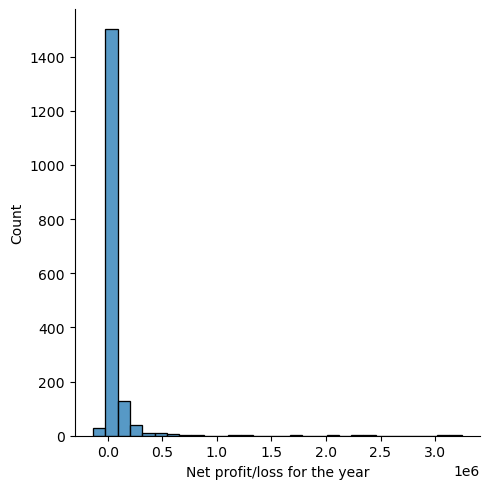

In [80]:
sns.displot(data=df, x="Net profit/loss for the year", bins=30)

Visualize the distribution of Net profit/loss for the year for each majority ruling per municipality

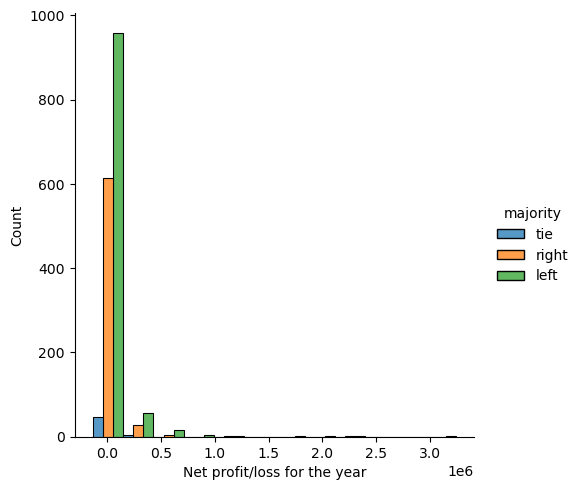

In [81]:
sns.displot(data=df, bins=12, x="Net profit/loss for the year", hue="majority", multiple="dodge")

Visualize the General grants and equalisation grants tied with the tax revenues for each political majority of the municipalities and years

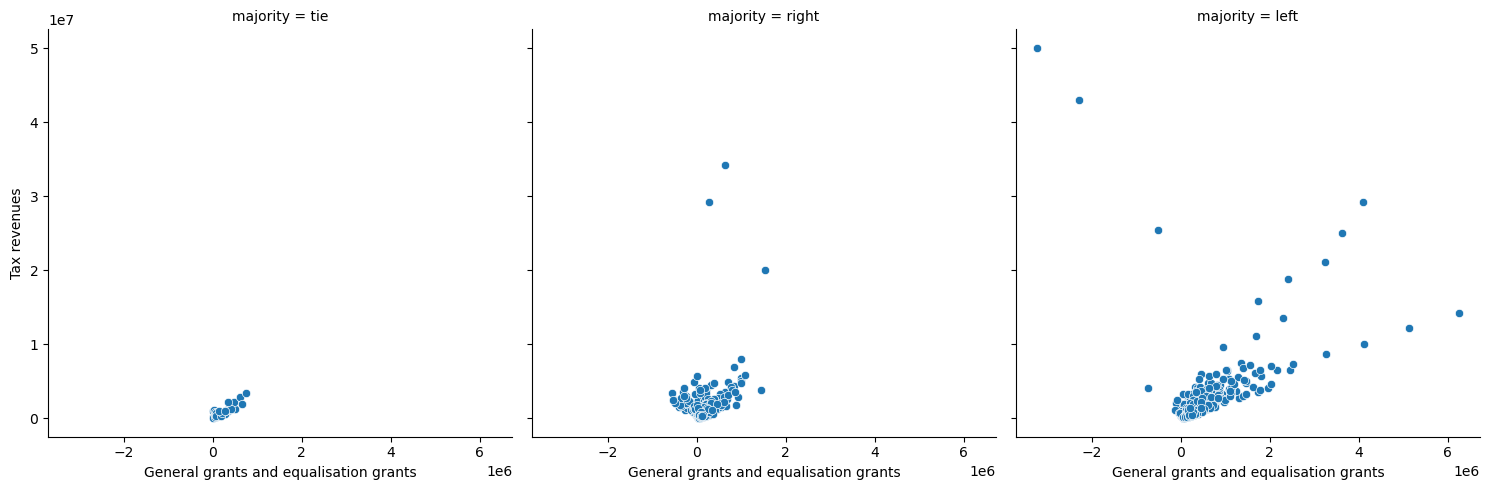

In [117]:
sns.relplot(data=df, x="General grants and equalisation grants", y="Tax revenues", col="majority")

Visualize how many high tax paying majorty ruled municipalities for each region for each year

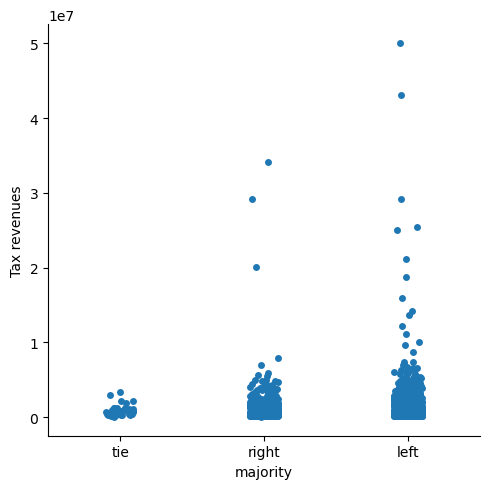

In [118]:
sns.catplot(data=df, x="majority", y="Tax revenues")

Visualize the correlation between Tax revenues and General grants and equalisation grants

<Axes: xlabel='General grants and equalisation grants', ylabel='Tax revenues'>

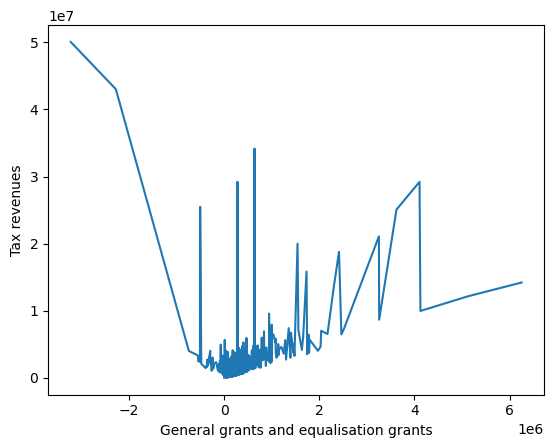

In [121]:
sns.lineplot(data=df, y="Tax revenues", x="General grants and equalisation grants")

## Task 3

Visualize the connection between General grants and equalisation grants and Tax revenues for each political ruling period for the majority rulings

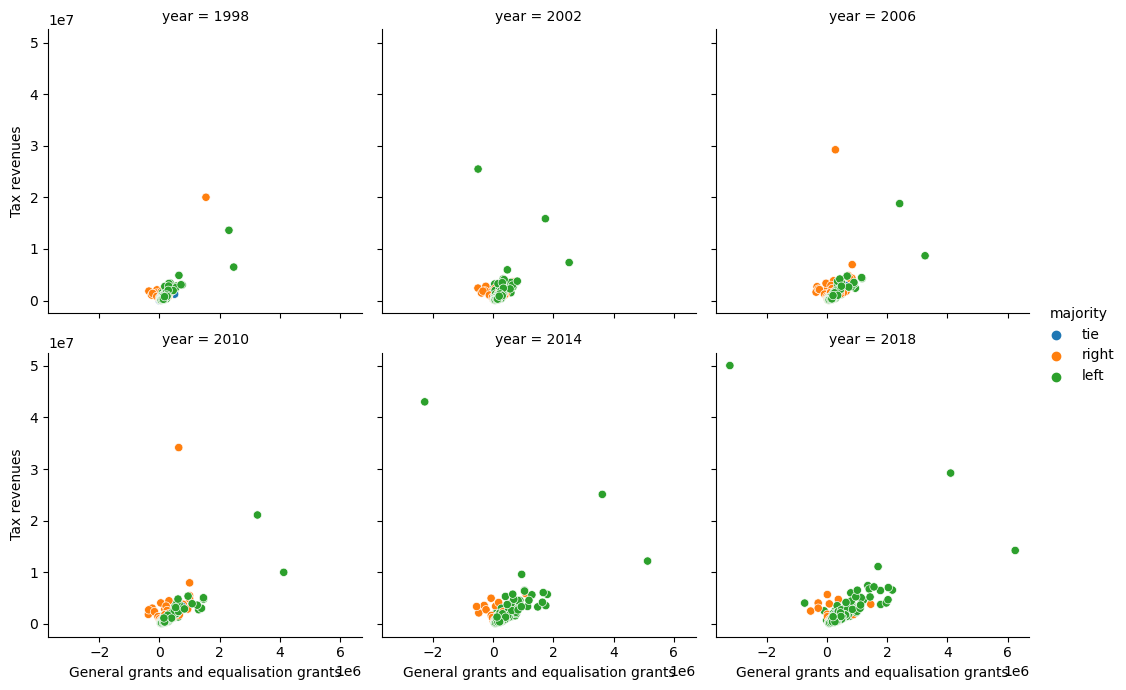

In [122]:
ax = sns.relplot(data=df, 
                 x="General grants and equalisation grants", 
                 y="Tax revenues", 
                 hue="majority", 
                 col="year",
                 col_wrap=3, 
                 height=3.5)


Summarize all the municipalities income statements for each political ruling for every year

In [86]:
df_cop = df.copy()
df_cop = df_cop.groupby(["majority", "year"]).mean().reset_index(level=["majority","year"])
df_cop

C:\Users\isacs\AppData\Local\Temp\ipykernel_7380\1518770105.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cop = df_cop.groupby(["majority", "year"]).mean().reset_index(level=["majority","year"])


,majority,year,Other Parties,The Centre Party,The Christian Democratic Party,The Green Party,The Left Party,The Liberal Party,The Moderate Party,The Social Democratic Party,...,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
0,left,1998,2.335329,4.269461,3.281437,2.017964,5.946108,2.209581,7.694611,19.646707,...,-30643.153293,32467.829940,178929.465868,2504.782036,0.000000,20442.495808,8.482333e+05,-1.264137e+06,309624.079042,-1.025227e+06
1,left,2002,2.076923,4.585799,3.023669,1.698225,4.668639,4.278107,6.201183,20.278107,...,-37855.629586,54179.428402,185924.543195,22253.390533,0.000000,33547.603550,1.186269e+06,-1.690626e+06,412361.952663,-1.364858e+06
2,left,2006,2.137405,4.740458,2.206107,1.435115,3.725191,2.809160,7.251908,19.870229,...,-35667.726718,46234.951145,270168.656489,37412.960305,0.000000,50370.931298,1.135790e+06,-1.684920e+06,385542.285496,-1.377613e+06
3,left,2010,1.557143,4.071429,1.471429,2.150000,3.400000,2.671429,8.064286,18.871429,...,-39642.555714,45188.557143,329053.222857,33444.435714,0.000000,45596.622857,1.218183e+06,-1.868928e+06,413588.292857,-1.519127e+06
4,left,2014,1.864865,4.200000,1.448649,2.589189,3.183784,2.362162,7.670270,17.010811,...,-26705.868108,49902.477838,379495.981622,74457.928649,0.000000,74520.765405,1.746783e+06,-2.623533e+06,635512.385946,-2.075017e+06
5,left,2018,2.008032,5.819277,2.124498,1.301205,3.016064,2.140562,7.518072,13.622490,...,-23513.570281,51798.594378,420235.921687,98444.080321,63466.318273,96707.236948,1.703333e+06,-2.541815e+06,583674.258032,-2.053410e+06
6,right,1998,1.672566,7.221239,4.327434,1.778761,2.725664,2.743363,10.619469,13.477876,...,-25997.987611,32052.417699,95636.162832,4780.042478,0.000000,12146.575221,6.904014e+05,-9.713523e+05,233191.207080,-7.863155e+05
7,right,2002,1.594828,7.663793,4.163793,1.318966,2.103448,4.396552,8.370690,14.077586,...,-8408.122414,10666.382759,92537.855172,13439.250000,0.000000,19599.582759,6.292576e+05,-8.606872e+05,199153.482759,-7.101045e+05
8,right,2006,1.986755,6.715232,3.357616,1.549669,1.761589,3.549669,11.377483,14.019868,...,-18022.388079,36297.437086,153040.203974,37199.491391,0.000000,49578.107285,1.120251e+06,-1.550148e+06,364335.365563,-1.252940e+06
9,right,2010,1.802920,5.525547,2.649635,2.642336,1.510949,3.642336,12.686131,12.861314,...,-23883.686131,39344.236496,199615.395620,54944.410219,0.000000,54897.391241,1.348652e+06,-1.883858e+06,435843.725547,-1.508500e+06


Visualize the net profits and losses for the political rulings each year

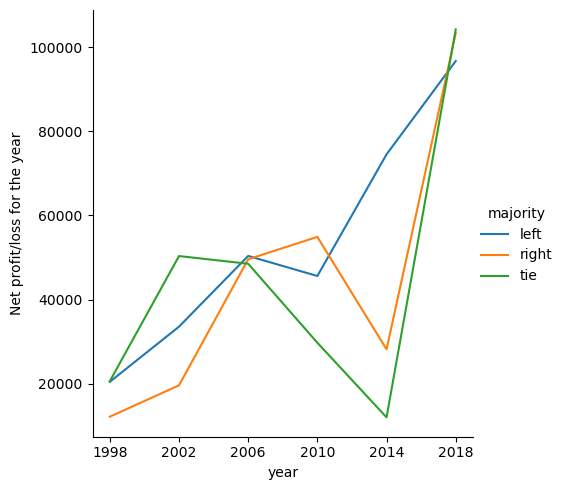

In [87]:
sns.relplot(data=df_cop, x="year", y="Net profit/loss for the year", hue="majority", kind="line")


Visualize the general grants and equalisation grants for the political rulings each year

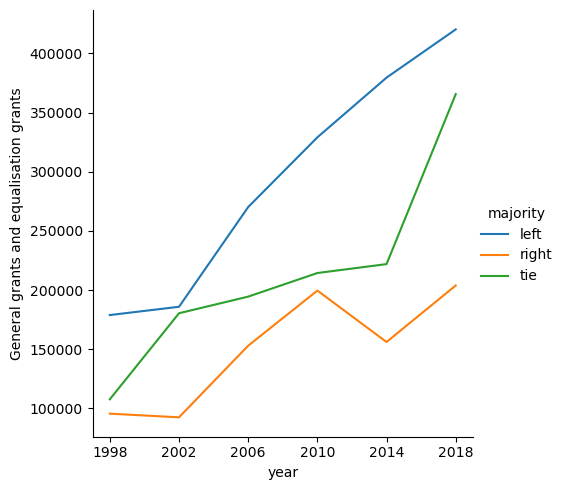

In [123]:
sns.relplot(data=df_cop, x="year", y="General grants and equalisation grants", hue="majority", kind="line")


## Task 4

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [89]:
test = pd.get_dummies(df["majority"])

Visualize if the political parties can be clustered with KMeans. Spoiler alert. No they can not.

c:\Users\isacs\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


<Axes: xlabel='Net profit/loss for the year', ylabel='Tax revenues'>

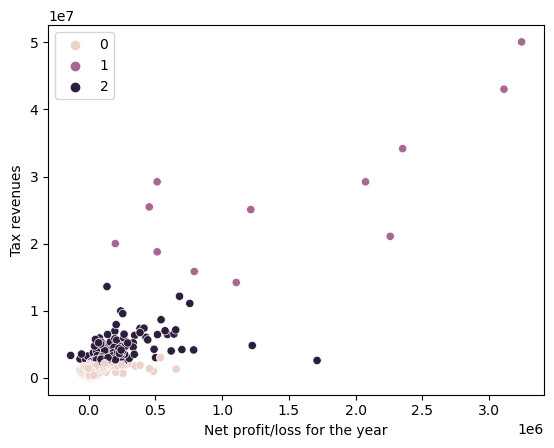

In [125]:
k_means = KMeans(n_clusters=3, random_state=10008)
X = df.iloc[:, 11:-1]
k_means.fit(X)
y = k_means.predict(X)

sns.scatterplot(x=df["Net profit/loss for the year"], y=df["Tax revenues"], hue=y)

Remove the political party seatings from test and train sets, replace regions with indices, make a 80/20 split.

In [91]:
X_clf = df.iloc[:, 11:-1]
X_clf["year"] = df["year"]
X_clf["region"] = pd.Categorical(df["region"]).codes

X_train, X_test, y_train, y_test = train_test_split(X_clf, df["majority"], test_size=0.2, random_state=124124)

Try predicting the majority seatings with a decision tree classifier with all the income statements

In [92]:
clf = DecisionTreeClassifier(random_state=124124)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [93]:
accuracy_score(y_test, predictions)

0.6925287356321839

In [94]:
confusion_matrix(y_test, predictions)

array([[160,  46,   3],
       [ 38,  81,   9],
       [  4,   7,   0]], dtype=int64)

Perform a grid search in search of the best hyperparameter tunings for the decision tree.

In [95]:
param_grid = [
    {"criterion":["gini", "entropy"], "max_depth":[3,4,5,7,8,10,12], "min_samples_split":[3,4,6,8,10,12], "min_samples_leaf":[1,2,4,6,7,9,10,12]}
]

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring="accuracy")
grid_dt.fit(X_train, y_train)
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 9,
 'min_samples_split': 12}

Predict majority seating once again with the best hyperparameters

In [96]:
model_dt = grid_dt.best_estimator_
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
accuracy_score(y_pred, y_test)

0.7241379310344828

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, df["majority"], test_size=0.2, random_state=123123)

Predict majority seating using a support vector machine

In [98]:
model = SVC(C=1.0, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.5919540229885057

Perform cross-validation on the support vector machine.

In [99]:
scores = cross_val_score(model, X_clf, df["majority"], cv=10)
scores.mean()

0.6005747126436781

Perform a grid search in search of the best hyperparameters for the support vector machine.

In [100]:
param_grid = [
    {"C": [1, 10, 100, 1000], "kernel": ["poly"]},
    {"C": [1, 10, 100, 1000], "gamma": [0.001, 0.0001], "kernel": ["rbf"]},
]

grid = GridSearchCV(SVC(), param_grid, scoring="accuracy")
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1000, 'kernel': 'poly'}

Predict with the support vector machine using the best hyperparameters.

In [101]:
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.6005747126436781

Perform cross validation using the best optimized support vector machine.

In [102]:
scores = cross_val_score(model, X_clf, df["majority"], cv=10)
scores.mean()

0.6011494252873564

## Task 5

In [104]:
from sklearn.inspection import permutation_importance

Calculate the permutation importance for the features with the support vector machine model.

In [105]:
pi = permutation_importance(model_dt, X_test, y_test, n_repeats=50, random_state=123123)
print(pi["importances_mean"])
pd.DataFrame([X_clf.columns, pi["importances_mean"]]).T.set_index(0)

[ 0.04178161 -0.00028736  0.13448276  0.0145977   0.         -0.00183908
  0.05063218  0.00258621  0.01373563  0.          0.06994253  0.22298851]


,1
0,
Financial costs,0.041782
Financial income,-0.000287
General grants and equalisation grants,0.134483
Net profit/loss after financial items,0.014598
Net profit/loss for operations,0.0
Net profit/loss for the year,-0.001839
Tax revenues,0.050632
Total costs for operations,0.002586
Total income for operations,0.013736


Try predicting using the two best features

In [109]:
#best_features = ["Tax revenues", "Total costs for operations", "Total income for operations", "Total net current costs", "Net profit/loss after financial items", "Net profit/loss for operations", "Financial income"]
best_features = ["region", "General grants and equalisation grants"]

X_train, X_test, y_train, y_test = train_test_split(X_clf.loc[:,best_features], df["majority"], random_state=123123)

model_dt.fit(X_train, y_train)
y_pred_best = model_dt.predict(X_test)
accuracy_score(y_pred_best, y_test)

0.7126436781609196

Try predicting using the worst two features

In [107]:
#best_features = ["Tax revenues", "Total costs for operations", "Total income for operations", "Total net current costs", "Net profit/loss after financial items", "Net profit/loss for operations", "Financial income"]
worst_features = ["Financial income", "Net profit/loss for the year"]

X_train, X_test, y_train, y_test = train_test_split(X_clf.loc[:,worst_features], df["majority"], random_state=123123)

model_dt.fit(X_train, y_train)
y_pred_worst = model_dt.predict(X_test)
accuracy_score(y_pred_worst, y_test)

0.542528735632184

Try predicting using all possitve PI features

In [112]:
possitive_features = ["region", "General grants and equalisation grants", "year", "Total net current costs", "Total income for operations", "Total costs for operations", "Tax revenues", "Net profit/loss for operations", "Net profit/loss after financial items", "Financial costs"]

X_train, X_test, y_train, y_test = train_test_split(X_clf.loc[:,possitive_features], df["majority"], random_state=123123)

model_dt.fit(X_train, y_train)
y_pred_possitive = model_dt.predict(X_test)
accuracy_score(y_pred_possitive, y_test)

0.6896551724137931

In [56]:
y_train.value_counts()

left     780
right    483
tie       42
Name: majority, dtype: int64

Predict using majority class

In [58]:
y_majority = ["left"] * len(y_test)
accuracy_score(y_majority, y_test)

0.6

MinMax normalize all columns except year and region

In [113]:
years = X_clf["year"].unique()
colums = X_clf.columns.to_list()
colums =  colums[:-2]
for y in years: # Min max normalization
    min_param = X_clf.loc[X_clf.loc[X_clf["year"].isin([y])].index.to_list(), colums].min()
    max_param = X_clf.loc[X_clf.loc[X_clf["year"].isin([y])].index.to_list(), colums].max()
    X_clf.loc[X_clf.loc[X_clf["year"].isin([y])].index.to_list(), colums] = (X_clf.loc[X_clf.loc[X_clf["year"].isin([y])].index.to_list(), colums] - min_param) / (max_param - min_param)

Replace null values with zeros

In [114]:
X_clf =  X_clf.fillna(0)

Make a 80/20 split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, df["majority"], random_state=123123)

Try predicting with normalization

In [116]:
model_dt.fit(X_train, y_train)
y_pred_best = model_dt.predict(X_test)
accuracy_score(y_pred_best, y_test)

0.735632183908046